# 03.1 - Primeiras previsões
## Análise e Previsão de Séries Temporais

Origem do Dataset: https://www.seade.gov.br/coronavirus/
Cópia feita pela Alura: https://github.com/alura-cursos/Prophet_covid/blob/main/dados_covid_sp.zip


In [1]:
url = 'https://github.com/alura-cursos/Prophet_covid/raw/main/dados_covid_sp.zip'

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pandas.plotting import autocorrelation_plot
import warnings
warnings.filterwarnings("ignore")

In [3]:
dados = pd.read_csv(url, sep = ';', compression='zip')
dados.head()

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,nome_drs,cod_drs,pop,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem
0,Adamantina,3500105,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Marília,5,33894,7398,41199,0,8.0,"-21,6820","-51,0737",9
1,Adolfo,3500204,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São José do Rio Preto,15,3447,761,21106,0,8.0,"-21,2325","-49,6451",9
2,Aguaí,3500303,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,35608,5245,47455,0,8.0,"-22,0572","-46,9735",9
3,Águas da Prata,3500402,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,São João da Boa Vista,14,7797,1729,14267,0,8.0,"-21,9319","-46,7176",9
4,Águas de Lindóia,3500501,25,2,2020-02-25,0,0,"0,000000e+00","0,0000000",0,...,Campinas,3,18374,3275,6013,0,8.0,"-22,4733","-46,6314",9


In [4]:
dados['datahora'] = pd.to_datetime(dados['datahora'],format='%Y-%m-%d')

In [5]:
mpl.rcParams['font.size'] = 18
mpl.rcParams['figure.figsize'] = (15,8)

<AxesSubplot:xlabel='datahora', ylabel='casos'>

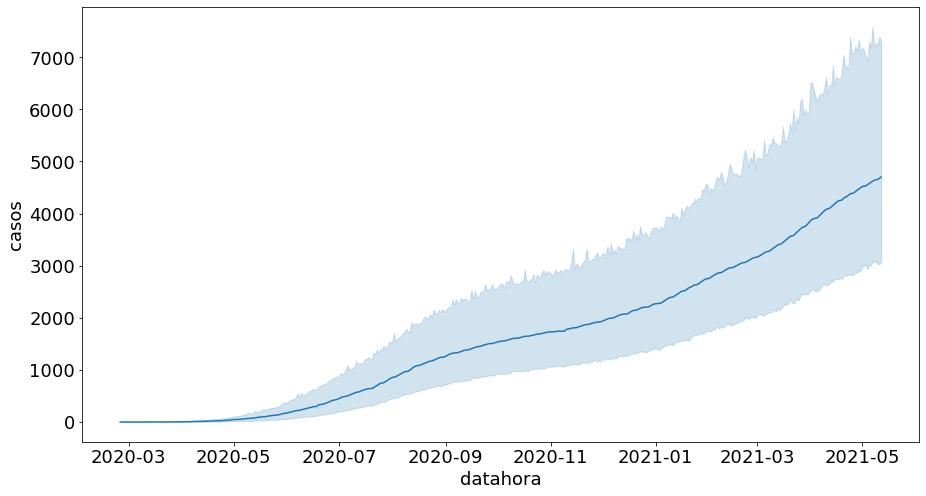

In [6]:
sns.lineplot(data=dados, x='datahora', y='casos')

In [7]:
dados_sp = dados.query('nome_munic == "São Paulo"')

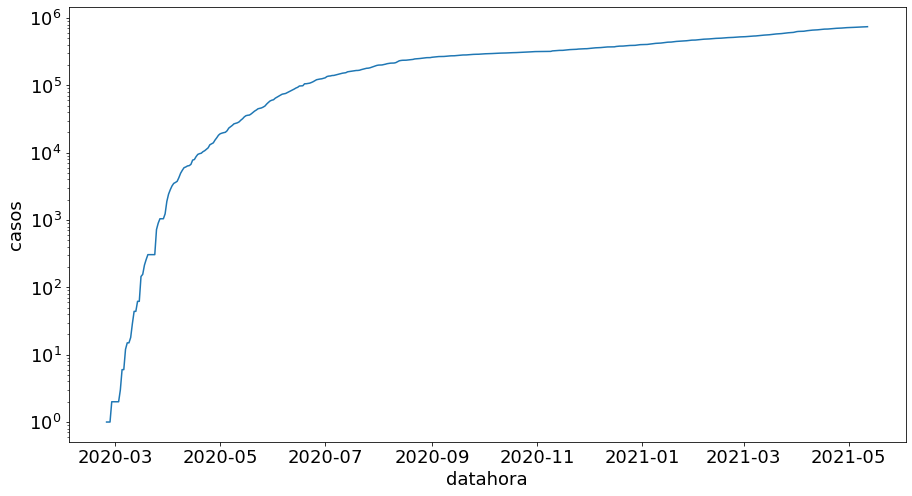

In [8]:
sns.lineplot(data=dados_sp, x='datahora', y='casos')
mpl.pyplot.yscale('log')

In [9]:
dados_praia_grande = dados[dados['nome_munic'] == 'Praia Grande']

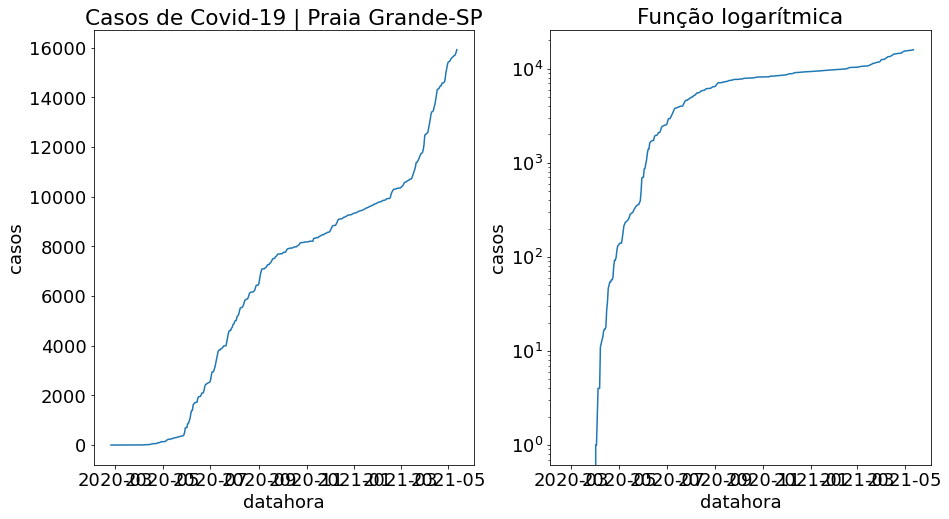

In [10]:
import math

fig, ax = plt.subplots(1,2)

sns.lineplot(data=dados_praia_grande, x='datahora', y='casos', ax=ax[0]).set_title('Casos de Covid-19 | Praia Grande-SP')

sns.lineplot(data=dados_praia_grande, x='datahora', y='casos', ax=ax[1]).set_title('Função logarítmica')

mpl.pyplot.yscale('log')

fig.show()

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

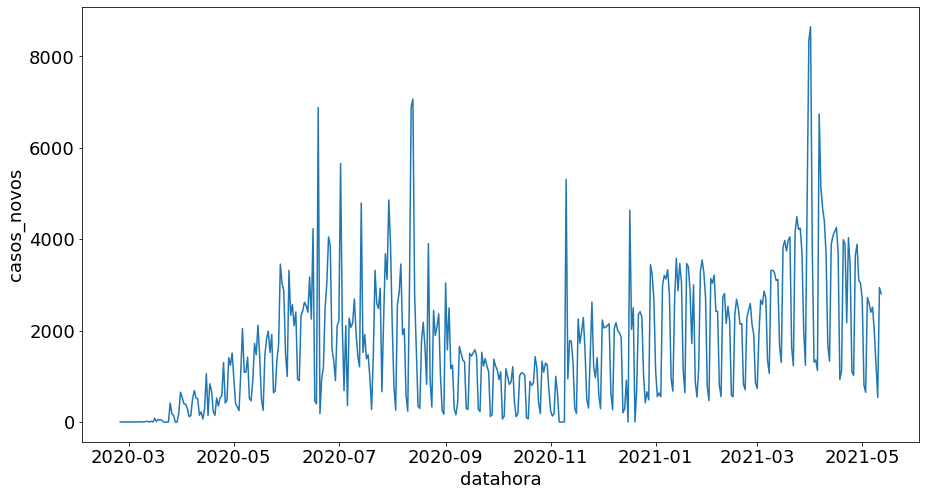

In [11]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos')

In [12]:
dados_exemplo = pd.DataFrame(data=np.linspace(1,10,10))

<AxesSubplot:xlabel='0', ylabel='0'>

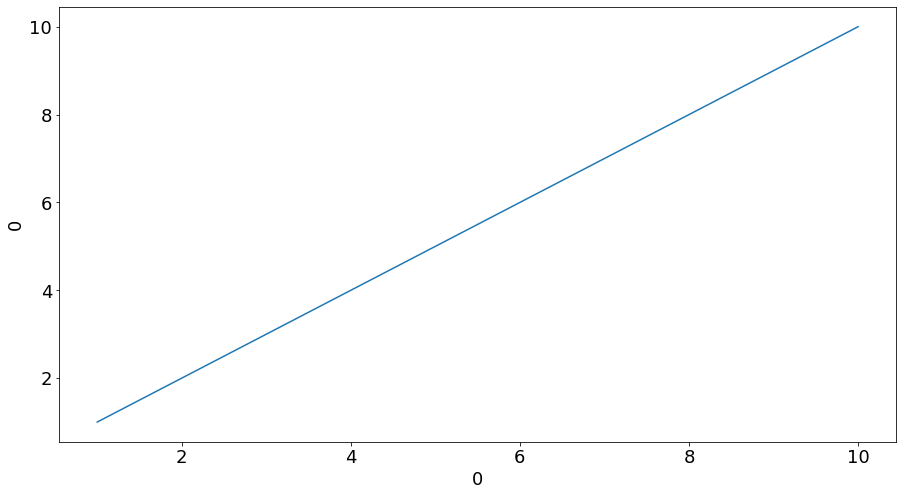

In [13]:
sns.lineplot(data=dados_exemplo, x=0, y=0)

In [14]:
dados_sp['taxa_de_crescimento_casos'] = dados_sp['casos_novos'].diff()
dados_sp['taxa_de_crescimento_obitos'] = dados_sp['obitos_novos'].diff()

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_casos'>

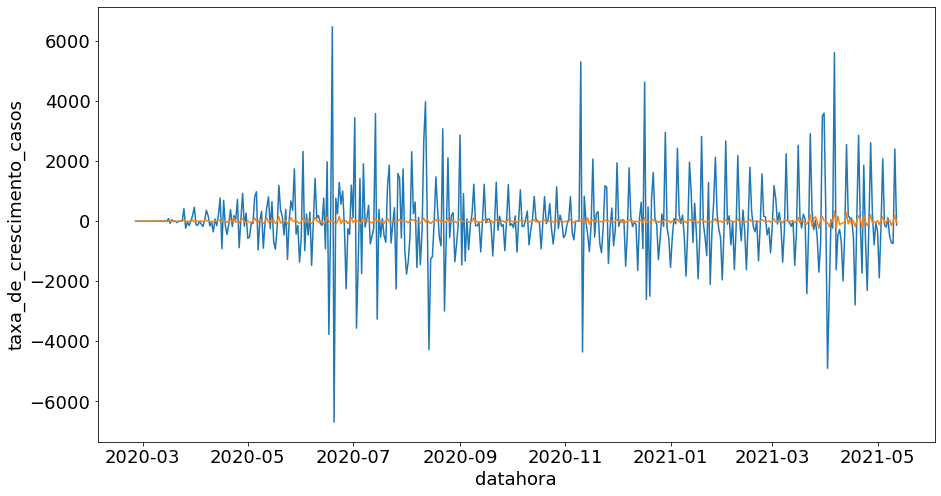

In [15]:
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_casos')
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_obitos')

<AxesSubplot:xlabel='datahora', ylabel='taxa_de_crescimento_obitos'>

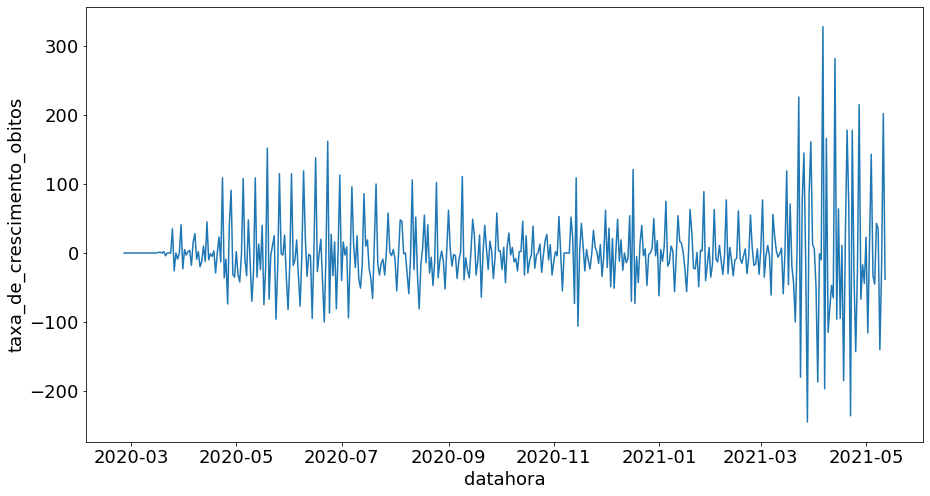

In [16]:
sns.lineplot(data=dados_sp, x='datahora', y='taxa_de_crescimento_obitos')

<BarContainer object of 443 artists>

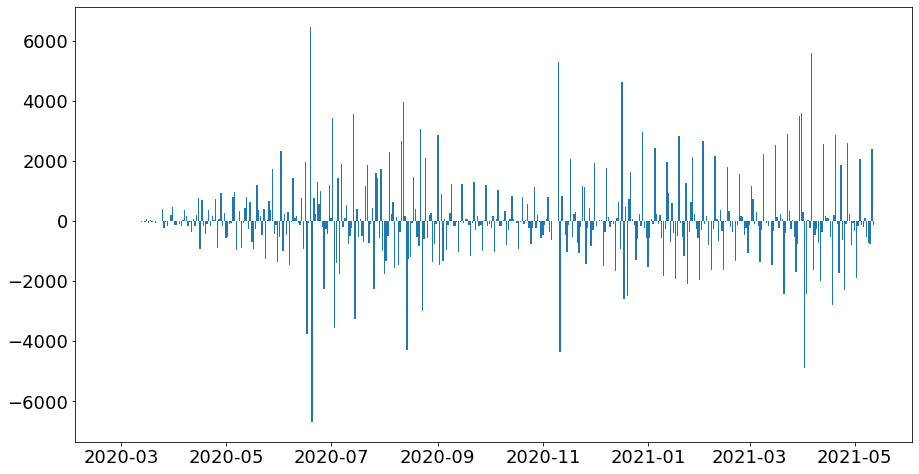

In [17]:
plt.bar(dados_sp['datahora'], dados_sp['taxa_de_crescimento_casos'])

In [18]:
dados_sp['ano'] = pd.DatetimeIndex(dados_sp['datahora']).year

In [19]:
dados_sp_2021 = dados_sp.query('ano == 2021')

In [20]:
dados_sp_2021

,nome_munic,codigo_ibge,dia,mes,datahora,casos,casos_novos,casos_pc,casos_mm7d,obitos,...,pop_60,area,map_leg,map_leg_s,latitude,longitude,semana_epidem,taxa_de_crescimento_casos,taxa_de_crescimento_obitos,ano
201157,São Paulo,3550308,1,1,2021-01-01,402835,1117,"3,393821e+03","1714,4285714",15695,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-1540.0,-62.0,2021
201802,São Paulo,3550308,2,1,2021-01-02,403388,553,"3,398480e+03","1733,0000000",15716,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",53,-564.0,5.0,2021
202447,São Paulo,3550308,3,1,2021-01-03,404025,637,"3,403846e+03","1729,7142857",15725,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,84.0,-12.0,2021
203092,São Paulo,3550308,4,1,2021-01-04,404576,551,"3,408489e+03","1739,2857143",15743,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,-86.0,9.0,2021
203737,São Paulo,3550308,5,1,2021-01-05,407557,2981,"3,433603e+03","1673,0000000",15836,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",1,2430.0,75.0,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283072,São Paulo,3550308,8,5,2021-05-08,735057,1998,"6,192738e+03","1956,5714286",28309,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",18,-515.0,35.0,2021
283717,São Paulo,3550308,9,5,2021-05-09,736342,1285,"6,203564e+03","2024,1428571",28347,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-713.0,-140.0,2021
284362,São Paulo,3550308,10,5,2021-05-10,736880,538,"6,208097e+03","2008,1428571",28364,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,-747.0,-21.0,2021
285007,São Paulo,3550308,11,5,2021-05-11,739821,2941,"6,232874e+03","2039,1428571",28583,...,1853286,152111,>5000,1.0,"-23,5329","-46,6395",19,2403.0,202.0,2021


<BarContainer object of 132 artists>

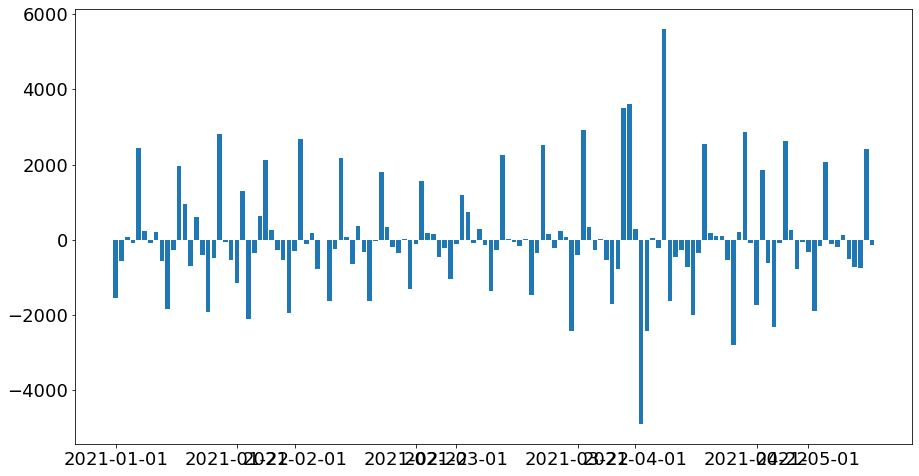

In [21]:
plt.bar(dados_sp_2021['datahora'], dados_sp_2021['taxa_de_crescimento_casos'])

In [22]:
dados_sp['media_movel_casos'] = dados_sp['casos_novos'].rolling(window=7, center=False).mean()
dados_sp['media_movel_obitos'] = dados_sp['obitos_novos'].rolling(window=7, center=False).mean()

<AxesSubplot:xlabel='datahora', ylabel='casos_novos'>

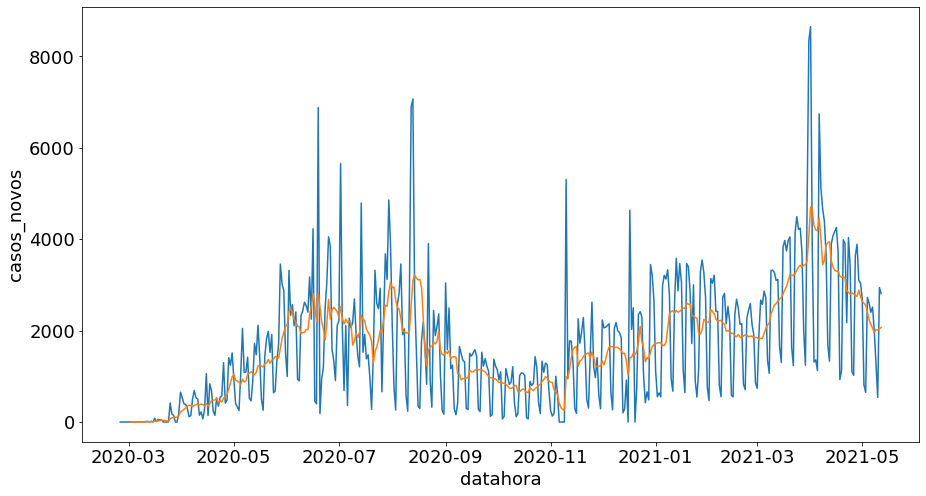

In [23]:
sns.lineplot(data=dados_sp, x='datahora', y='casos_novos')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_casos')

<AxesSubplot:xlabel='datahora', ylabel='obitos_novos'>

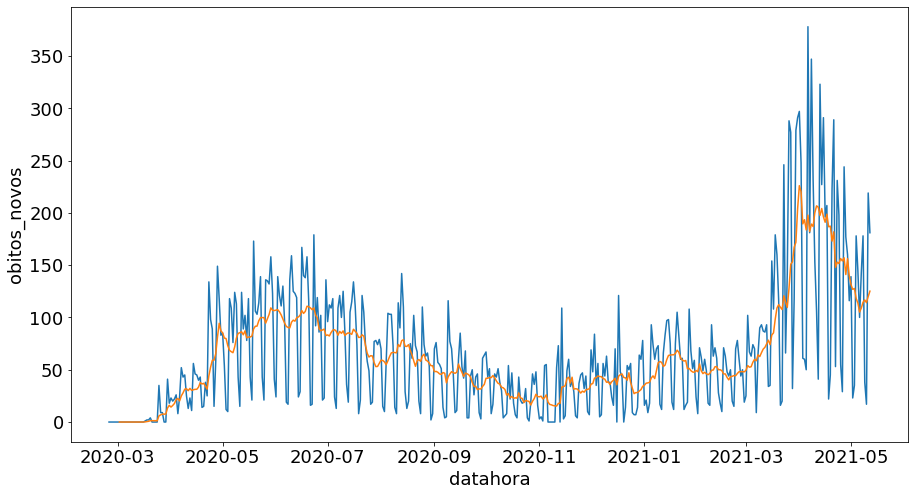

In [24]:
sns.lineplot(data=dados_sp, x='datahora', y='obitos_novos')
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_obitos')

<AxesSubplot:xlabel='datahora', ylabel='obitos_novos'>

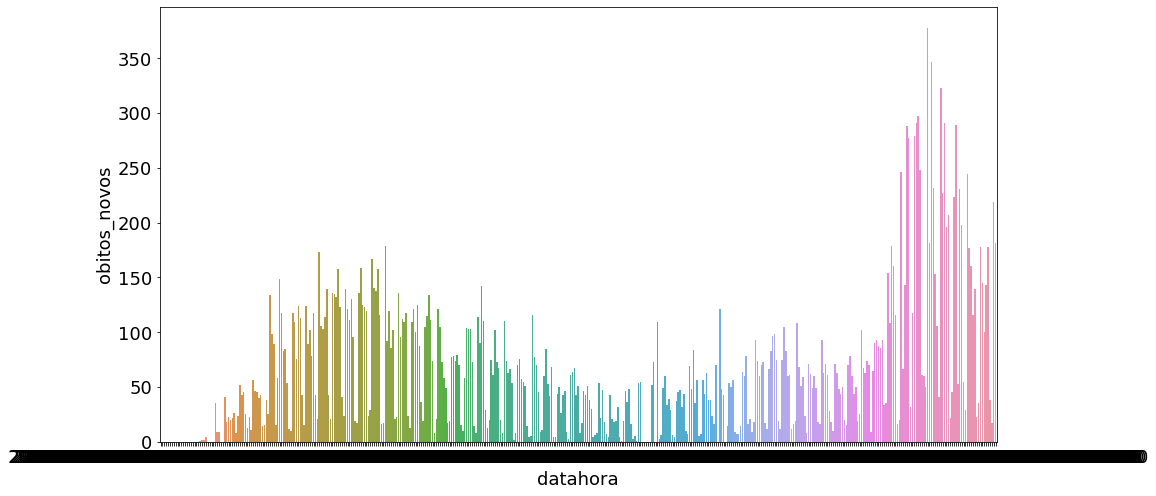

In [25]:
sns.barplot(data=dados_sp, x='datahora', y='obitos_novos')

<AxesSubplot:xlabel='datahora', ylabel='media_movel_obitos'>

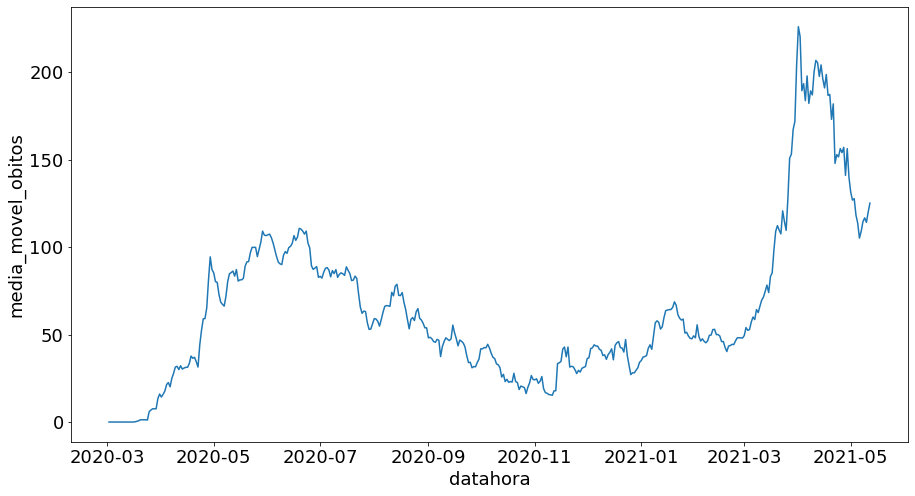

In [26]:
sns.lineplot(data=dados_sp, x='datahora', y='media_movel_obitos')

<AxesSubplot:xlabel='casos_novos', ylabel='casos_novos'>

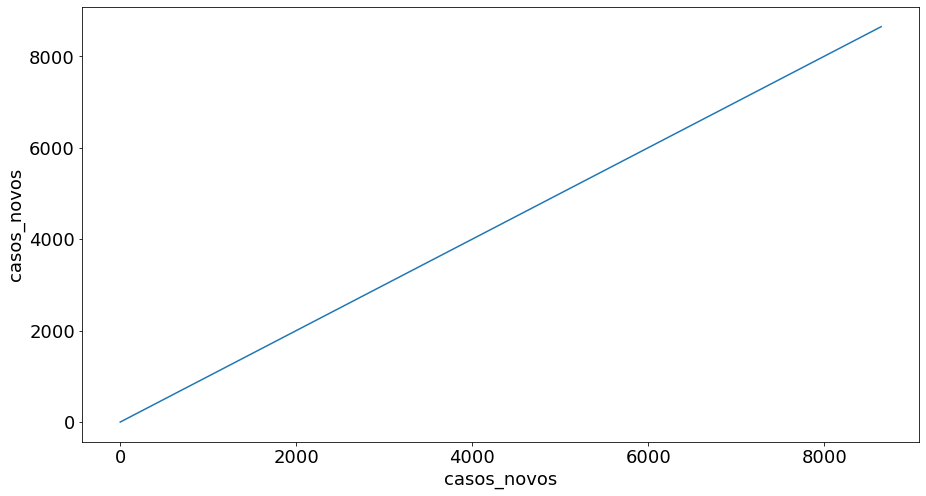

In [27]:
sns.lineplot(data=dados_sp, x='casos_novos', y='casos_novos')

<AxesSubplot:xlabel='casos_novos', ylabel='obitos_novos'>

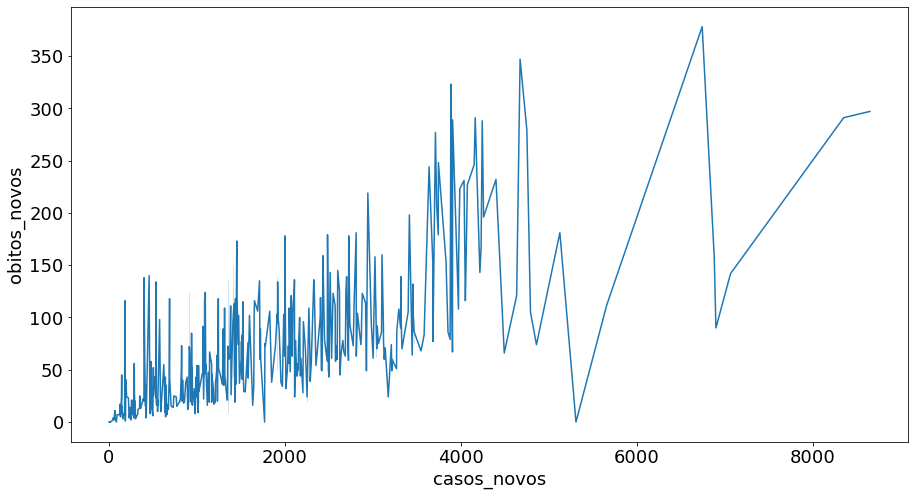

In [28]:
sns.lineplot(data=dados_sp, x='casos_novos', y='obitos_novos')

<AxesSubplot:xlabel='media_movel_casos', ylabel='media_movel_obitos'>

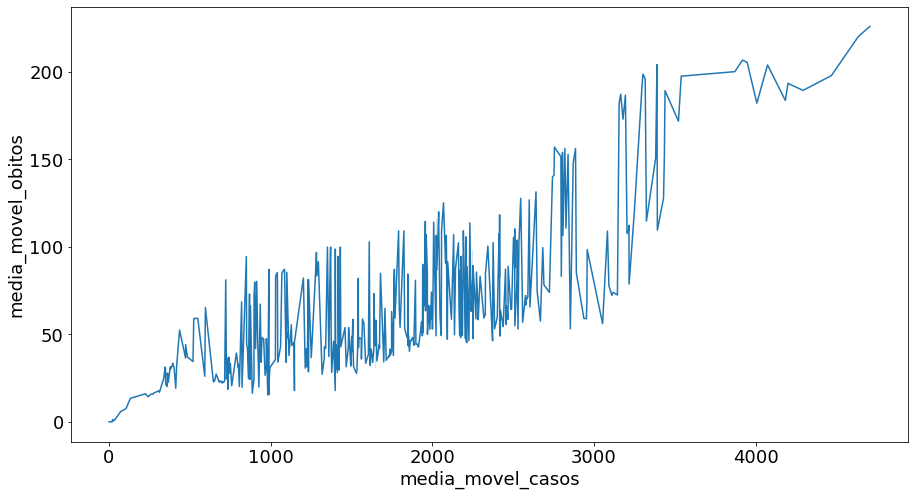

In [29]:
sns.lineplot(data=dados_sp, x='media_movel_casos', y='media_movel_obitos')

In [30]:
dados_sp_2021_01 = dados_sp.query('mes == 1 & ano == 2021')
dados_sp_2021_02 = dados_sp.query('mes == 2 & ano == 2021')

<BarContainer object of 31 artists>

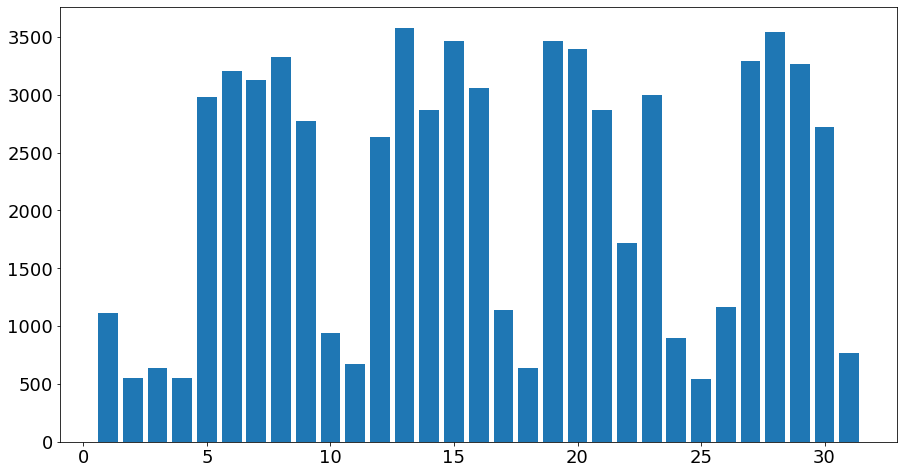

In [31]:
plt.bar(np.linspace(1,31,31),dados_sp_2021_01['casos_novos'])

<BarContainer object of 28 artists>

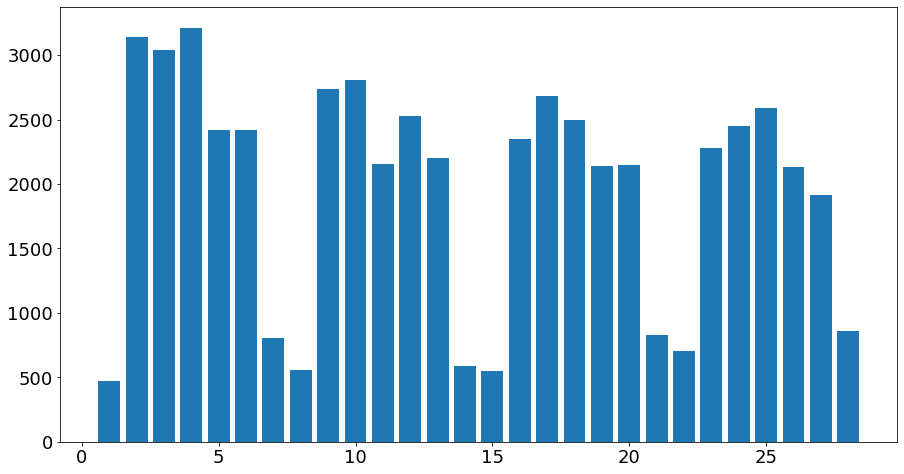

In [32]:
plt.bar(np.linspace(1,28,28),dados_sp_2021_02['casos_novos'])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

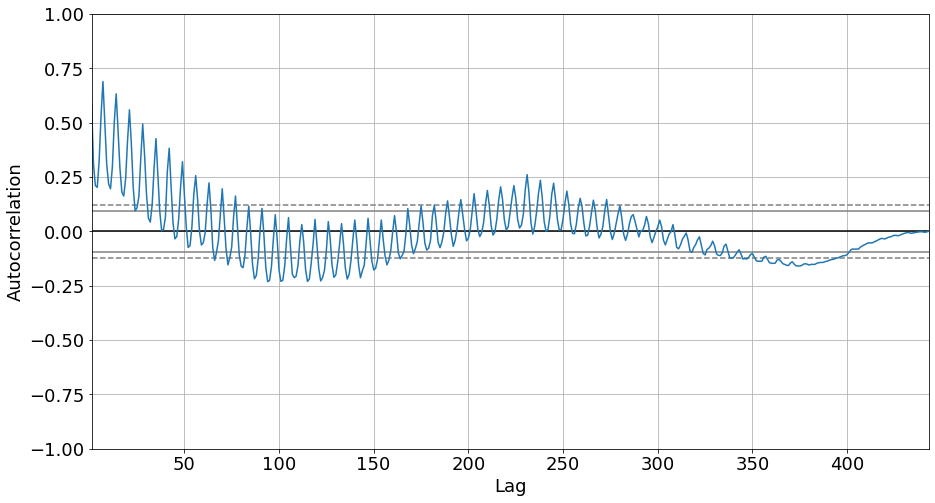

In [33]:
autocorrelation_plot(dados_sp['casos_novos'])

In [34]:
dados_sp.shape[0]

443

In [35]:
aleatorio = np.random.rand(dados_sp.shape[0])

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

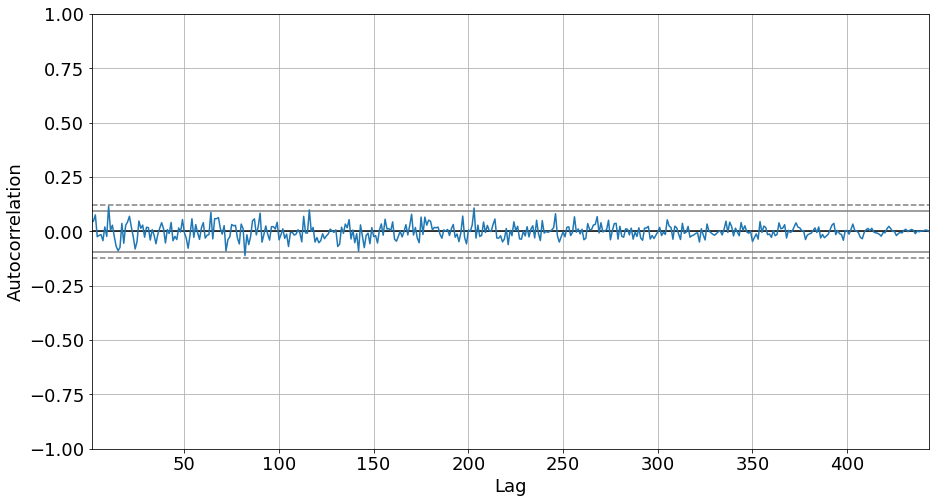

In [36]:
autocorrelation_plot(aleatorio)

In [37]:
casos = dados_sp['casos_novos']
obitos = dados_sp['obitos_novos']

cruzada = np.correlate(casos, obitos, 'full')

<AxesSubplot:xlabel='Lag', ylabel='Autocorrelation'>

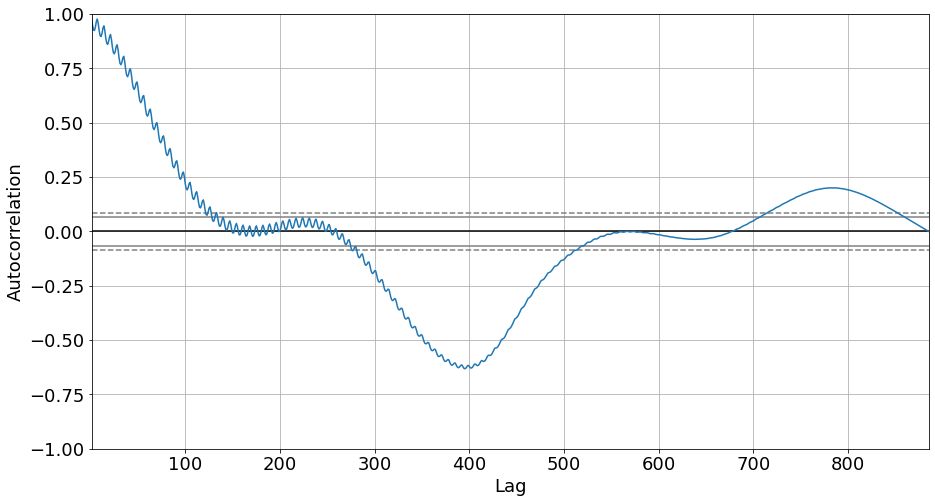

In [38]:
autocorrelation_plot(cruzada)

In [39]:
df = pd.DataFrame()

In [40]:
df['ds'] = dados_sp['datahora']

In [41]:
df['y'] = dados_sp['casos_novos']

In [54]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [55]:
import prophet

ModuleNotFoundError: No module named 'prophet'

In [ ]:
!pip install fbprophet